In [2]:
import os
import scanpy as sc
import anndata as an
import numpy as np
from pathlib import Path
from matplotlib import rcParams
from deside.utility import set_fig_style
set_fig_style(font_family='Arial', font_size=8)

In [3]:
dataset_dir = '../../datasets/'
fig_dir = './sup_fig_results/'

In [4]:
s1 = an.read_h5ad(os.path.join(dataset_dir, 'generated_sc_dataset_7ds_n_base100', 'simu_bulk_exp_SCT_POS_N10K_log2cpm1p.h5ad'))
s1

AnnData object with n_obs × n_vars = 110000 × 12114
    obs: 'B Cells', 'CD4 T', 'CD8 T', 'Cancer Cells', 'DC', 'Endothelial Cells', 'Fibroblasts', 'Macrophages', 'Mast Cells', 'NK', 'Neutrophils'
    var: 'in_bulk'
    uns: 'cell_types', 'dataset_info'

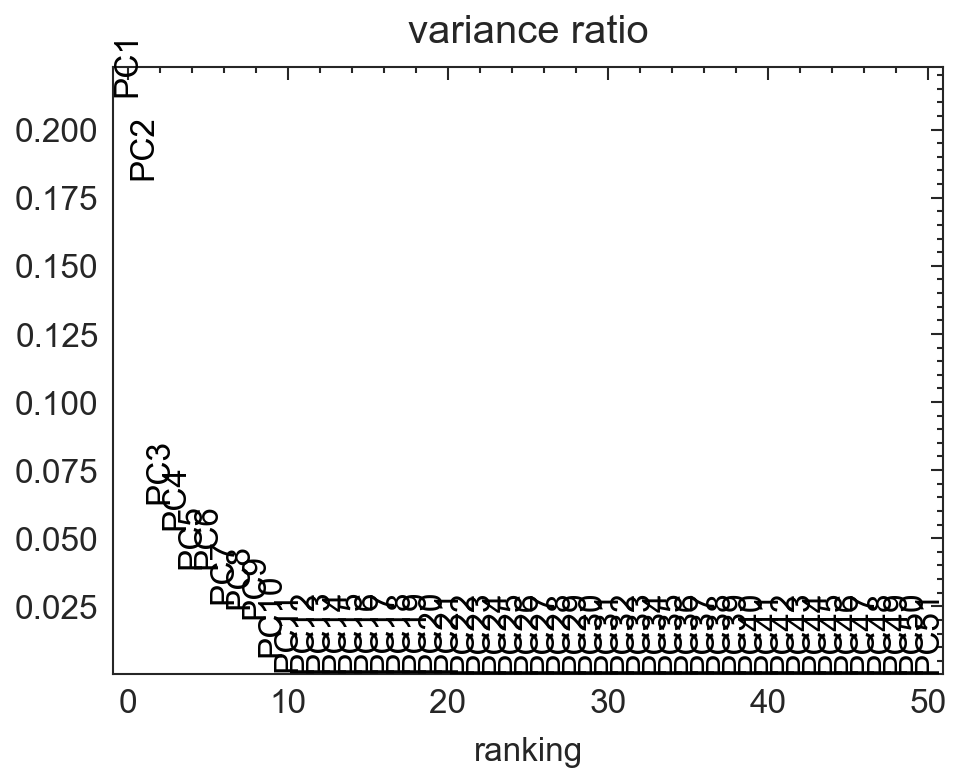

In [5]:
sc.tl.pca(s1, svd_solver='arpack', n_comps=100, use_highly_variable=False, zero_center=True)
sc.pl.pca_variance_ratio(s1, n_pcs=50)

In [6]:
sc.pp.neighbors(s1, n_neighbors=10, n_pcs=50)
sc.tl.umap(s1)
sc.tl.leiden(s1)

/home/phyxiongx/.conda/envs/ds/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [7]:
id2cell_type = dict(zip(range(11), list(s1.obs.columns)[:11]))
id2cell_type

{0: 'B Cells',
 1: 'CD4 T',
 2: 'CD8 T',
 3: 'Cancer Cells',
 4: 'DC',
 5: 'Endothelial Cells',
 6: 'Fibroblasts',
 7: 'Macrophages',
 8: 'Mast Cells',
 9: 'NK',
 10: 'Neutrophils'}

In [8]:
s1.obs['cell_type_id'] = np.argmax(s1.obs.iloc[:, 0:11].values, axis=1)
s1.obs['cell_type'] = s1.obs['cell_type_id'].map(id2cell_type)

In [9]:
s1.obs.head(2)

,B Cells,CD4 T,CD8 T,Cancer Cells,DC,Endothelial Cells,Fibroblasts,Macrophages,Mast Cells,NK,Neutrophils,leiden,cell_type_id,cell_type
sct_SCT_POS_pos_0,1,0,0,0,0,0,0,0,0,0,0,5,0,B Cells
sct_SCT_POS_pos_1,1,0,0,0,0,0,0,0,0,0,0,5,0,B Cells


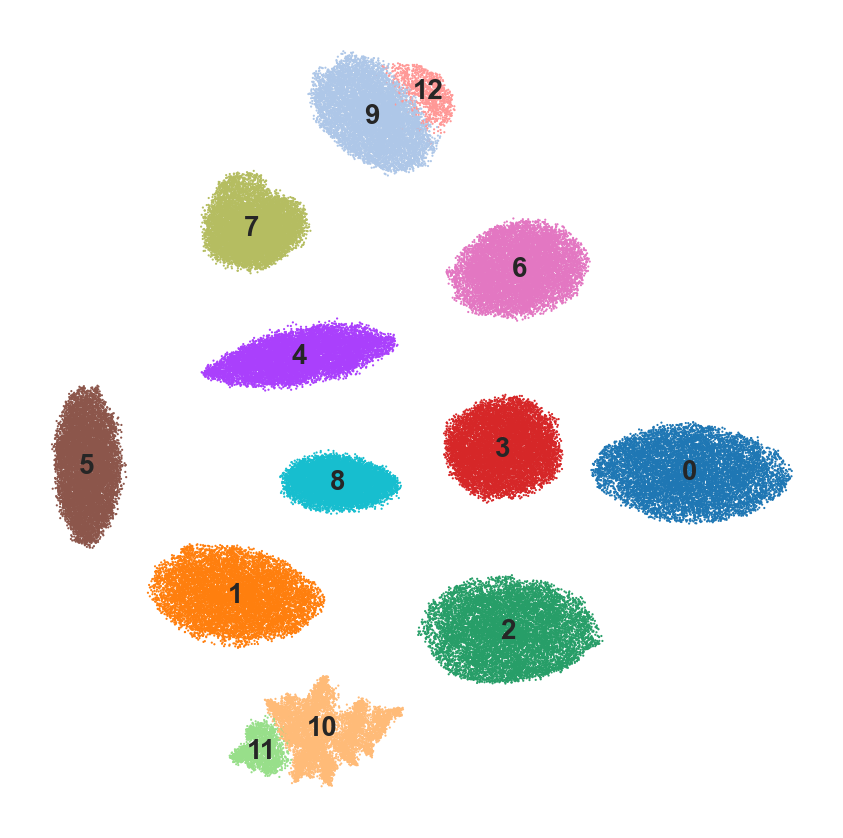

In [13]:
sc._settings.ScanpyConfig.figdir = Path(fig_dir)
rcParams['figure.figsize'] = 3.5, 3.5
sc.pl.umap(s1, color='leiden', legend_loc='on data', legend_fontsize='small', 
           title='', frameon=False, save='_clustering_S1.png')

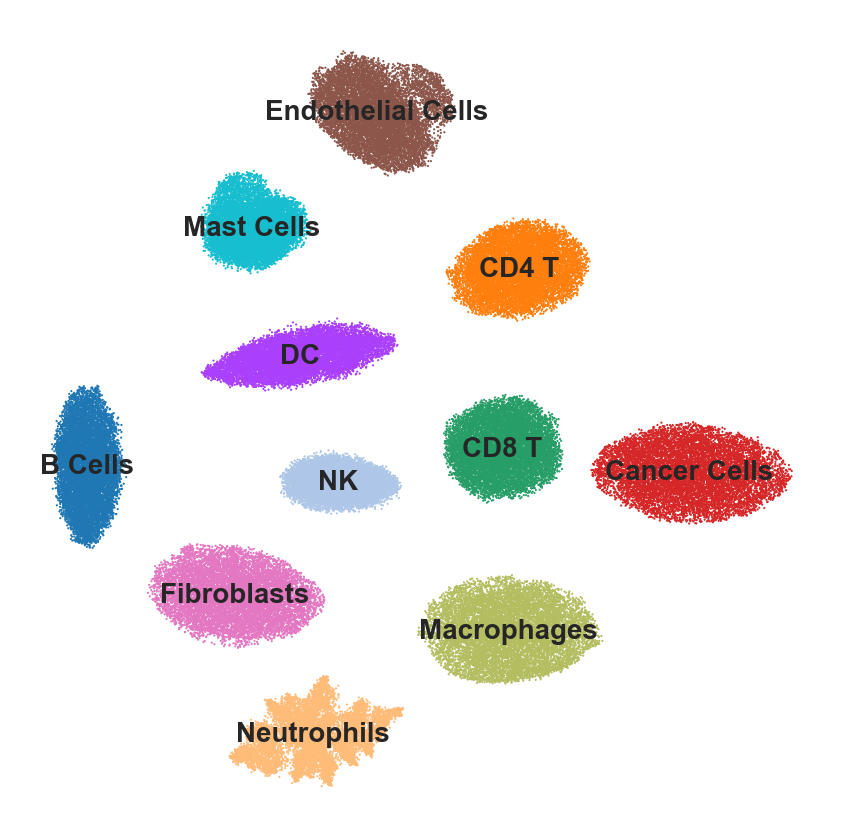

In [14]:
sc.pl.umap(s1, color='cell_type', legend_loc='on data', legend_fontsize='small', 
           title='', frameon=False, save='_cell_type_S1.png')